In [4]:
#Mount Data From Drive
from google.colab import drive
import pandas as pd

drive.mount('/content/gdrive')

save_df = pd.read_csv('gdrive/My Drive/Colab Notebooks/LAMP/output.csv')


import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from torch.utils.data import DataLoader, Dataset, random_split
from sklearn.model_selection import train_test_split
from torch.nn import TransformerEncoder, TransformerEncoderLayer
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

Mounted at /content/gdrive


In [5]:
#Mount Data From Drive
AC_df=pd.read_csv('gdrive/My Drive/Colab Notebooks/LAMP/00_df_raw_AC.csv')
MC_df=pd.read_csv('gdrive/My Drive/Colab Notebooks/LAMP/00_df_raw_MC.csv')

In [6]:
#Importing Libraries
import numpy as np
import pandas as pd
import io
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression, SGDClassifier, RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GroupKFold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
#from sklearn.externals import joblib
save_df = pd.read_csv('gdrive/My Drive/Colab Notebooks/LAMP/output.csv')


In [7]:
factor = pd.factorize(save_df['target'])
save_df['target'] = factor[0]
definitions = factor[1]
print(save_df.target.head())
print(definitions)

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64
Int64Index([0, 1, 2, 3, 4], dtype='int64')


In [8]:
melts = save_df.iloc[:,8:43]

In [11]:
max_values = melts.max(axis=1)
max_columns = melts.idxmax(axis=1)
result_df = pd.DataFrame({'Max Value': max_values, 'Max Column': max_columns})
print(result_df)
save_df = pd.concat([save_df, max_columns], axis=1)

       Max Value Max Column
0       0.869591         32
1       0.915977         35
2       0.840591         34
3       0.937856         35
4       0.966757         34
...          ...        ...
50451   1.187878         32
50452   1.224665         28
50453   1.212442         33
50454   1.211222         23
50455   1.203976         28

[50456 rows x 2 columns]


In [12]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
def evaluate_and_get_metrics(model, inputs, labels):
    model.eval()
    with torch.no_grad():
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
    return predicted.cpu().numpy(), labels.cpu().numpy()

In [13]:

def get_accuracy(model, inputs, labels):
    model.eval()
    with torch.no_grad():
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        correct = (preds == labels).sum().item()
        accuracy = (correct / len(labels)) * 100
    model.train()
    return accuracy

In [14]:
def evaluate_model(model, inputs, labels, criterion):
    model.eval()
    with torch.no_grad():
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        _, predicted = torch.max(outputs.data, 1)
        correct = (predicted == labels).sum().item()
        accuracy = correct / labels.size(0) * 100
    model.train()
    return loss.item(), accuracy

In [15]:
import random

def split_list_randomly(input_list, ratios):
    random.shuffle(input_list)
    split_indices = [0]
    cumulative_ratio = 0

    for ratio in ratios:
        cumulative_ratio += ratio
        split_index = int(len(input_list) * cumulative_ratio)
        split_indices.append(split_index)

    split_lists = [input_list[split_indices[i]:split_indices[i+1]] for i in range(len(split_indices)-1)]
    return split_lists

df = save_df

unique_elements = df['group_ID'].unique().tolist()

train_ratio = 0.8
test_ratio = 0.2

split = split_list_randomly(unique_elements, [train_ratio,test_ratio])

train_df = df[df['group_ID'].isin(split[0])]
test_df = df[df['group_ID'].isin(split[1])]

unique_elements = train_df['group_ID'].unique().tolist()

split = split_list_randomly(unique_elements, [0.2,0.2,0.2,0.2,0.2])
df_sub0 = train_df[train_df['group_ID'].isin(split[0])]
df_sub1 = train_df[train_df['group_ID'].isin(split[1])]
df_sub2 = train_df[train_df['group_ID'].isin(split[2])]
df_sub3 = train_df[train_df['group_ID'].isin(split[3])]
df_sub4 = train_df[train_df['group_ID'].isin(split[4])]

In [ ]:
# #Splitting the data into independent and dependent variables
# X = save_df.iloc[:,43:107].values
# y = save_df.iloc[:,2].values

# #scaler = MinMaxScaler()

# codes = save_df.iloc[:,1].values

# # X = scaler.fit_transform(X)
# # X_test = scaler.fit_transform(X)
# # X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
# # X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# X_test, y_test =  test_df.iloc[:,8:43].values, test_df.iloc[:,2].values
# X_train, y_train = pd.concat([df_sub4, df_sub1, df_sub0, df_sub3], axis=0).iloc[:,8:43].values, pd.concat([df_sub4, df_sub1, df_sub0, df_sub3], axis=0).iloc[:,2].values
# X_val, y_val = df_sub2.iloc[:,8:43].values, df_sub2.iloc[:,2].values

# X_train = X_train.reshape(-1, 1, X_train.shape[1])
# X_val = X_val.reshape(-1, 1, X_val.shape[1])
# X_test = X_test.reshape(-1, 1, X_test.shape[1])

# X_train = torch.tensor(X_train, dtype=torch.float32)
# y_train = torch.tensor(y_train, dtype=torch.long)
# X_val = torch.tensor(X_val, dtype=torch.float32)
# y_val = torch.tensor(y_val, dtype=torch.long)
# X_test = torch.tensor(X_test, dtype=torch.float32)
# y_test = torch.tensor(y_test, dtype=torch.long)

In [16]:
#Splitting the data into independent and dependent variables
X = save_df.iloc[:,8:43].values
y = save_df.iloc[:,2].values

scaler = MinMaxScaler()

codes = save_df.iloc[:,1].values

X = scaler.fit_transform(X)

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

X_train = X_train.reshape(-1, 1, X_train.shape[1])
X_val = X_val.reshape(-1, 1, X_val.shape[1])
X_test = X_test.reshape(-1, 1, X_test.shape[1])

X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)
X_val = torch.tensor(X_val, dtype=torch.float32)
y_val = torch.tensor(y_val, dtype=torch.long)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.long)

In [17]:
class TransformerModel(nn.Module):
    def __init__(self, input_size, d_model, nhead, num_layers, output_size, max_len):
        super(TransformerModel, self).__init__()
        self.embedding = nn.Linear(input_size, d_model)
        self.pos_encoder = PositionalEncoding(d_model, max_len=max_len)
        self.transformer_layer = TransformerEncoderLayer(d_model, nhead, batch_first=True)
        self.transformer_encoder = TransformerEncoder(self.transformer_layer, num_layers)
        self.fc = nn.Linear(d_model, output_size)

    def forward(self, x):
        x = self.embedding(x)
        x = self.pos_encoder(x)
        x = self.transformer_encoder(x)
        x = self.fc(x[:, -1, :])
        return x

class PositionalEncoding(nn.Module):
    def __init__(self, d_model, dropout=0.1, max_len=1000):
        super(PositionalEncoding, self).__init__()
        self.dropout = nn.Dropout(p=dropout)

        pe = torch.zeros(max_len, d_model)
        position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-np.log(10000.0) / d_model))
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        pe = pe.unsqueeze(0).transpose(0, 1)
        self.register_buffer('pe', pe)

    def forward(self, x):
        x = x + self.pe[:x.size(1), :, :].squeeze(1).unsqueeze(0)
        return self.dropout(x)


In [ ]:
import itertools

input_sizes = [X_train.shape[2]]
d_models = [128]
nheads = [4, 8]
num_layers_list = [2, 3]
output_sizes = [len(np.unique(y_train.numpy()))]
max_lens = [X_train.shape[1]]
lr = [0.001, 0.0001, 0.00001]
num_epochs = [200]
batch_size = [32, 64]
val_interval = 1


best_accuracy = 0.0
best_model = None
best_hyperparameters = None

for input_size, d_model, nhead, num_layers, output_size, max_len, lr, num_epochs, batch_size in itertools.product(input_sizes, d_models, nheads, num_layers_list, output_sizes, max_lens, lr, num_epochs, batch_size):
    print(f"Testing hyperparameters: input_size={input_size}, d_model={d_model}, nhead={nhead}, num_layers={num_layers}, output_size={output_size}, max_len={max_len}, lr={lr}, batch_size={batch_size}")

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    transformer_model = TransformerModel(input_size, d_model, nhead, num_layers, output_size, max_len=max_len).to(device)

    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(transformer_model.parameters(), lr=lr)


    transformer_model.train()

    train_losses = []
    val_losses = []
    train_accuracies = []
    val_accuracies = []

    for epoch in range(num_epochs):
        for i in range(0, len(X_train), batch_size):
            inputs = X_train[i:i+batch_size].to(device)
            labels = y_train[i:i+batch_size].to(device)

            optimizer.zero_grad()
            outputs = transformer_model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            torch.nn.utils.clip_grad_norm_(transformer_model.parameters(), max_norm=1.0) #gradient clipping
            optimizer.step()

        if (epoch + 1) % val_interval == 0:
            train_accuracy = get_accuracy(transformer_model, X_train.to(device), y_train.to(device))
            val_loss, val_accuracy = evaluate_model(transformer_model, X_val.to(device), y_val.to(device), criterion)
            # print(f"Epoch: {epoch+1}, Train Loss: {loss.item():.4f}, Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.2f}%")
            train_losses.append(loss.item())
            train_accuracies.append(train_accuracy)
            val_losses.append(val_loss)
            val_accuracies.append(val_accuracy)

    val_loss, val_accuracy = evaluate_model(transformer_model, X_val.to(device), y_val.to(device), criterion)

    model_name = f"gdrive/My Drive/Colab Notebooks/LAMP/transformers_final/MC_dmodel_{d_model}_nhead_{nhead}_layers_{num_layers}_LR_{lr}_batchsize_{batch_size}.pt"
    torch.save(transformer_model.state_dict(), model_name)

    print(f"Validation Accuracy: {val_accuracy:.2f}%")

    # Update the best model and hyperparameters if the current accuracy is higher
    if val_accuracy > best_accuracy:
        best_accuracy = val_accuracy
        best_model = model_name
        best_hyperparameters = (input_size, d_model, nhead, num_layers, output_size, max_len)

# Print the best model and hyperparameters
print(f"\nBest model: {best_model}")
print(f"Best hyperparameters: input_size={best_hyperparameters[0]}, d_model={best_hyperparameters[1]}, nhead={best_hyperparameters[2]}, num_layers={best_hyperparameters[3]}, output_size={best_hyperparameters[4]}, max_len={best_hyperparameters[5]}")
print(f"Best validation accuracy: {best_accuracy:.2f}%")

Testing hyperparameters: input_size=35, d_model=128, nhead=4, num_layers=2, output_size=5, max_len=1, lr=0.001, batch_size=32
Validation Accuracy: 92.27%
Testing hyperparameters: input_size=35, d_model=128, nhead=4, num_layers=2, output_size=5, max_len=1, lr=0.001, batch_size=64
Validation Accuracy: 93.56%
Testing hyperparameters: input_size=35, d_model=128, nhead=4, num_layers=2, output_size=5, max_len=1, lr=0.0001, batch_size=32
Validation Accuracy: 93.68%
Testing hyperparameters: input_size=35, d_model=128, nhead=4, num_layers=2, output_size=5, max_len=1, lr=0.0001, batch_size=64
Validation Accuracy: 94.26%
Testing hyperparameters: input_size=35, d_model=128, nhead=4, num_layers=2, output_size=5, max_len=1, lr=1e-05, batch_size=32
Validation Accuracy: 90.77%
Testing hyperparameters: input_size=35, d_model=128, nhead=4, num_layers=2, output_size=5, max_len=1, lr=1e-05, batch_size=64
Validation Accuracy: 89.03%
Testing hyperparameters: input_size=35, d_model=128, nhead=4, num_layers=3

In [18]:
input_size=35
d_model=128
nhead=4
num_layers=3
output_size=5
max_len=1
lr = 0.0001
batch_size = 64

In [19]:
best_hyperparameters = (input_size, d_model, nhead, num_layers, output_size, max_len)

Test Loss: 0.2105, Test Accuracy: 94.72%
Confusion Matrix (Transformer):


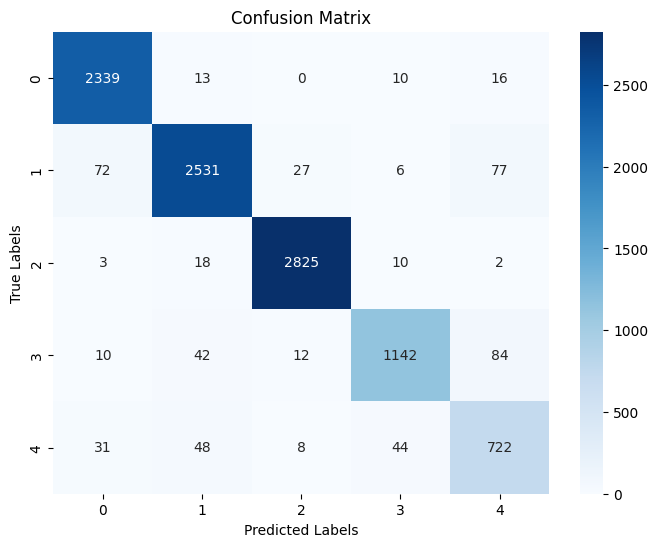


Classification Report (Transformer):
              precision    recall  f1-score   support

           0       0.95      0.98      0.97      2378
           1       0.95      0.93      0.94      2713
           2       0.98      0.99      0.99      2858
           3       0.94      0.89      0.91      1290
           4       0.80      0.85      0.82       853

    accuracy                           0.95     10092
   macro avg       0.93      0.93      0.93     10092
weighted avg       0.95      0.95      0.95     10092

Accuracy (Transformer): 0.95


In [22]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

best_transformer_model = TransformerModel(*best_hyperparameters).to(device)
# Load the saved model state_dict
best_transformer_model.load_state_dict(torch.load(f"gdrive/My Drive/Colab Notebooks/LAMP/transformers_final/MC_dmodel_{d_model}_nhead_{nhead}_layers_{num_layers}_LR_{lr}_batchsize_{batch_size}.pt", weights_only=True))

# Set the model to evaluation mode
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(best_transformer_model.parameters(), lr=lr)
best_transformer_model.eval()
test_loss, test_accuracy = evaluate_model(best_transformer_model, X_test.to(device), y_test.to(device), criterion)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%")

y_pred_transformer, y_true_transformer = evaluate_and_get_metrics(best_transformer_model, X_test.to(device), y_test.to(device))

conf_matrix_transformer = confusion_matrix(y_true_transformer, y_pred_transformer)
print("Confusion Matrix (Transformer):")
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_transformer, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

class_report_transformer = classification_report(y_true_transformer, y_pred_transformer)
print("\nClassification Report (Transformer):")
print(class_report_transformer)

acc_score_transformer = accuracy_score(y_true_transformer, y_pred_transformer)
print(f"Accuracy (Transformer): {acc_score_transformer:.2f}")

In [31]:
val_interval = 1

num_epochs = 150
best_accuracy = 0.0
best_model = None
best_hyperparameters = None
input_size=35
d_model=128
nhead=8
num_layers=3
output_size=5
max_len=1
lr = 0.0001
batch_size = 128

print(f"Testing hyperparameters: input_size={input_size}, d_model={d_model}, nhead={nhead}, num_layers={num_layers}, output_size={output_size}, max_len={max_len}, lr={lr}, batch_size={batch_size}")

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

transformer_model = TransformerModel(input_size, d_model, nhead, num_layers, output_size, max_len=max_len).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(transformer_model.parameters(), lr=lr)


transformer_model.train()

train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

for epoch in range(num_epochs):
    for i in range(0, len(X_train), batch_size):
        inputs = X_train[i:i+batch_size].to(device)
        labels = y_train[i:i+batch_size].to(device)

        optimizer.zero_grad()
        outputs = transformer_model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        torch.nn.utils.clip_grad_norm_(transformer_model.parameters(), max_norm=1.0) #gradient clipping
        optimizer.step()

    if (epoch + 1) % val_interval == 0:
        train_accuracy = get_accuracy(transformer_model, X_train.to(device), y_train.to(device))
        val_loss, val_accuracy = evaluate_model(transformer_model, X_val.to(device), y_val.to(device), criterion)
        # print(f"Epoch: {epoch+1}, Train Loss: {loss.item():.4f}, Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.2f}%")
        train_losses.append(loss.item())
        train_accuracies.append(train_accuracy)
        val_losses.append(val_loss)
        val_accuracies.append(val_accuracy)

val_loss, val_accuracy = evaluate_model(transformer_model, X_val.to(device), y_val.to(device), criterion)

model_name = f"gdrive/My Drive/Colab Notebooks/LAMP/transformers_final/MC_dmodel_{d_model}_nhead_{nhead}_layers_{num_layers}_LR_{lr}_batchsize_{batch_size}.pt"
torch.save(transformer_model.state_dict(), model_name)

print(f"Validation Accuracy: {val_accuracy:.2f}%")

# Update the best model and hyperparameters if the current accuracy is higher
if val_accuracy > best_accuracy:
    best_accuracy = val_accuracy
    best_model = model_name
    best_hyperparameters = (input_size, d_model, nhead, num_layers, output_size, max_len)

# Print the best model and hyperparameters
print(f"\nBest model: {best_model}")
print(f"Best hyperparameters: input_size={best_hyperparameters[0]}, d_model={best_hyperparameters[1]}, nhead={best_hyperparameters[2]}, num_layers={best_hyperparameters[3]}, output_size={best_hyperparameters[4]}, max_len={best_hyperparameters[5]}")
print(f"Best validation accuracy: {best_accuracy:.2f}%")

Testing hyperparameters: input_size=35, d_model=128, nhead=8, num_layers=3, output_size=5, max_len=1, lr=0.0001, batch_size=128
Validation Accuracy: 94.23%

Best model: gdrive/My Drive/Colab Notebooks/LAMP/transformers_final/MC_dmodel_128_nhead_8_layers_3_LR_0.0001_batchsize_128.pt
Best hyperparameters: input_size=35, d_model=128, nhead=8, num_layers=3, output_size=5, max_len=1
Best validation accuracy: 94.23%


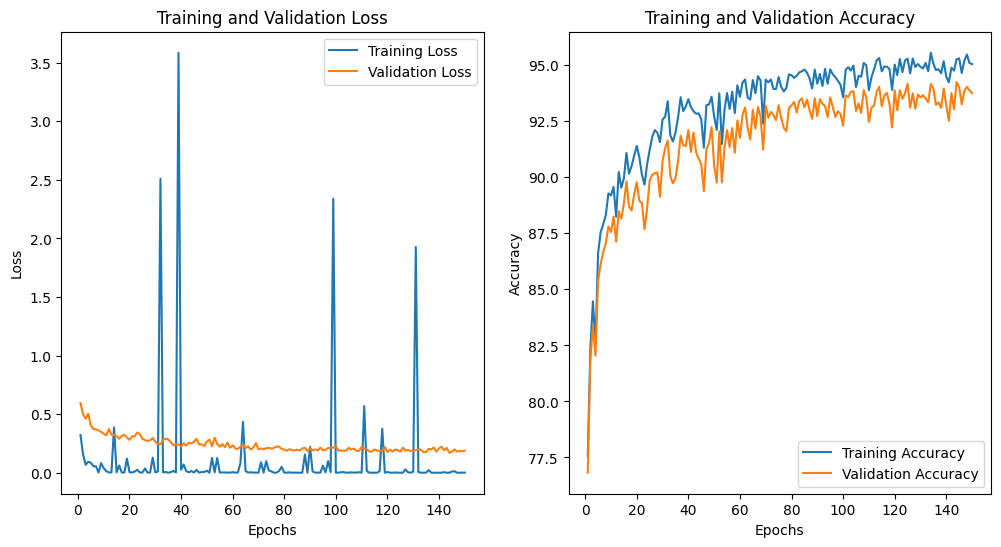

In [30]:
epochs = np.arange(1, len(train_losses) + 1) * val_interval

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(epochs, train_losses, label="Training Loss")
plt.plot(epochs, val_losses, label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracies, label="Training Accuracy")
plt.plot(epochs, val_accuracies, label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()

plt.show()